<a href="https://colab.research.google.com/github/aovladi/cs480student/blob/main/04/CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

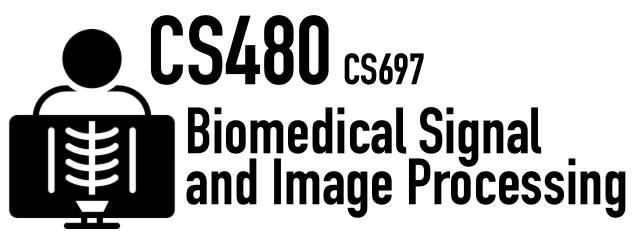
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7MB 7.8MB/s 


In [3]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [10]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
#import zipfile
#with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
#    zip_ref.extractall('.')

NORMAL_DIR = 'xray/normal/'
PNEUMONIA_DIR = 'xray/pneumonia/'

In [11]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [28]:
# TODO: Please display this image and print the dimensions!


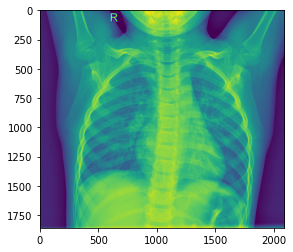

In [29]:
# TODO: YOUR CODE
plt.imshow(img)

In [21]:
print("Image dimetions: {} x {}".format(img.shape[0], img.shape[1]))

Image dimetions: 1858 x 2090


**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [22]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [23]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) Resize: mh.imresize( loaded_image, (300, 300) )
# TODO: Operation 2) Unifying: pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [84]:
def display(array, title, n):
  fig=plt.figure(figsize=(20,5))
  fig.suptitle('{} {} images'.format(n,title), fontsize=48)
  columns = n
  rows = 1
  for i in range(1,columns*rows +1):
    img = array[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
  plt.show()

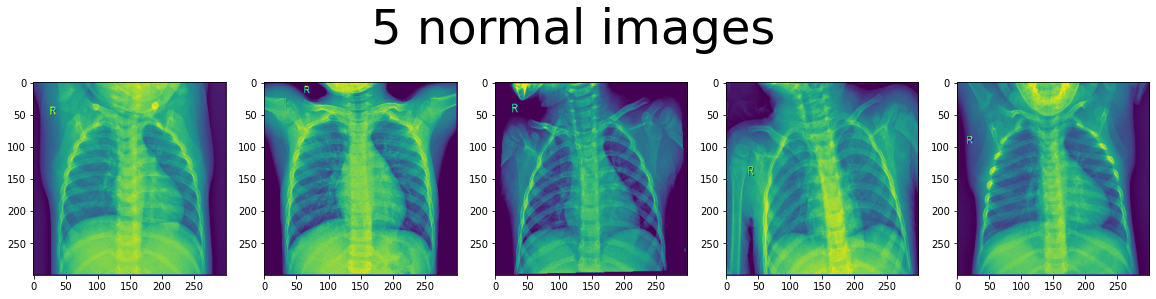

In [85]:
# TODO: YOUR CODE
display(normal_images, "normal", 5)

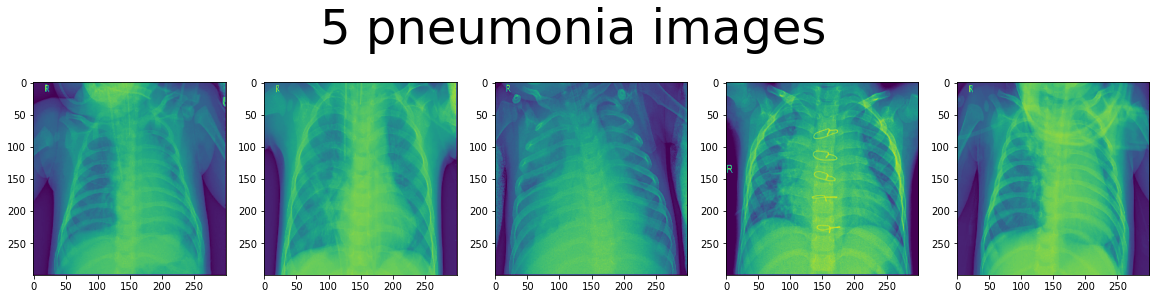

In [86]:
display(pneumonia_images, "pneumonia", 5)

**Task 3:** Setup training and testing data. [15 Points]

In [49]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [50]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [59]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = np.concatenate((np.zeros(TRAINING_COUNT), np.ones(TRAINING_COUNT))) # TODO
training_target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [60]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [61]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = np.concatenate((np.zeros(TESTING_COUNT), np.ones(TESTING_COUNT))) # TODO
testing_target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [222]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [223]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [224]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [225]:
# TODO: YOUR ANSWER

In [226]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.95

In [227]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [228]:
# TODO: Given that we have a balanced distribution among our classes (60 for normal and 60 for pheumonia)
# the performance is good 90%

**Bonus:** Let's take a closer look! [33 Points]

In [229]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

Misclassified images are: [26 44 73 79]. 
Index starts from 0.


IndexError: ignored

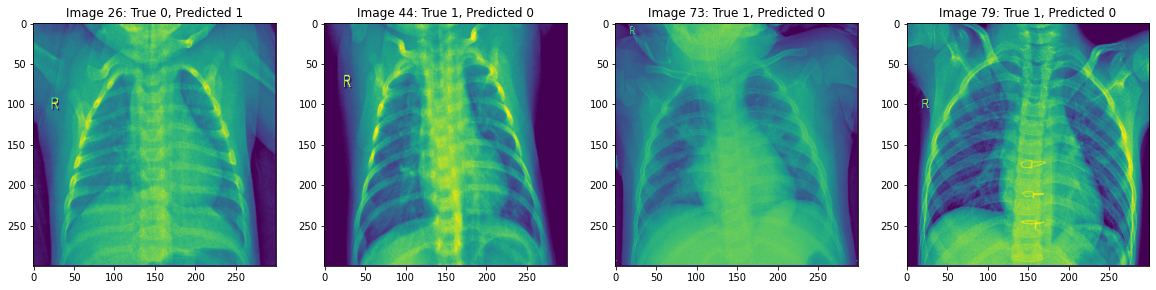

In [230]:
# TODO: YOUR CODE AND YOUR ANSWER
predictions = clf.predict(testing_data)
misclassified = predictions == testing_target
misclassified_idx = np.where(misclassified==False)[0]
print("Misclassified images are: {}. \nIndex starts from 0.".format(misclassified_idx))
images = [testing_data[i] for i in misclassified_idx]
fig=plt.figure(figsize=(20,10))
columns = 4
rows = 2
for i in range(1,columns*rows +1):
  img = np.resize( images[i-1], (300, 300) )
  fig.add_subplot(rows, columns, i).set_title("Image {}: True {}, Predicted {}".format(
                                            misclassified_idx[i-1],
                                            int(testing_target[misclassified_idx[i-1]]),
                                            int(predictions[misclassified_idx[i-1]])))
  plt.imshow(img)
plt.show()

In [231]:
good_images = list(range(len(testing_target)))
good_images = np.delete(good_images,misclassified_idx)

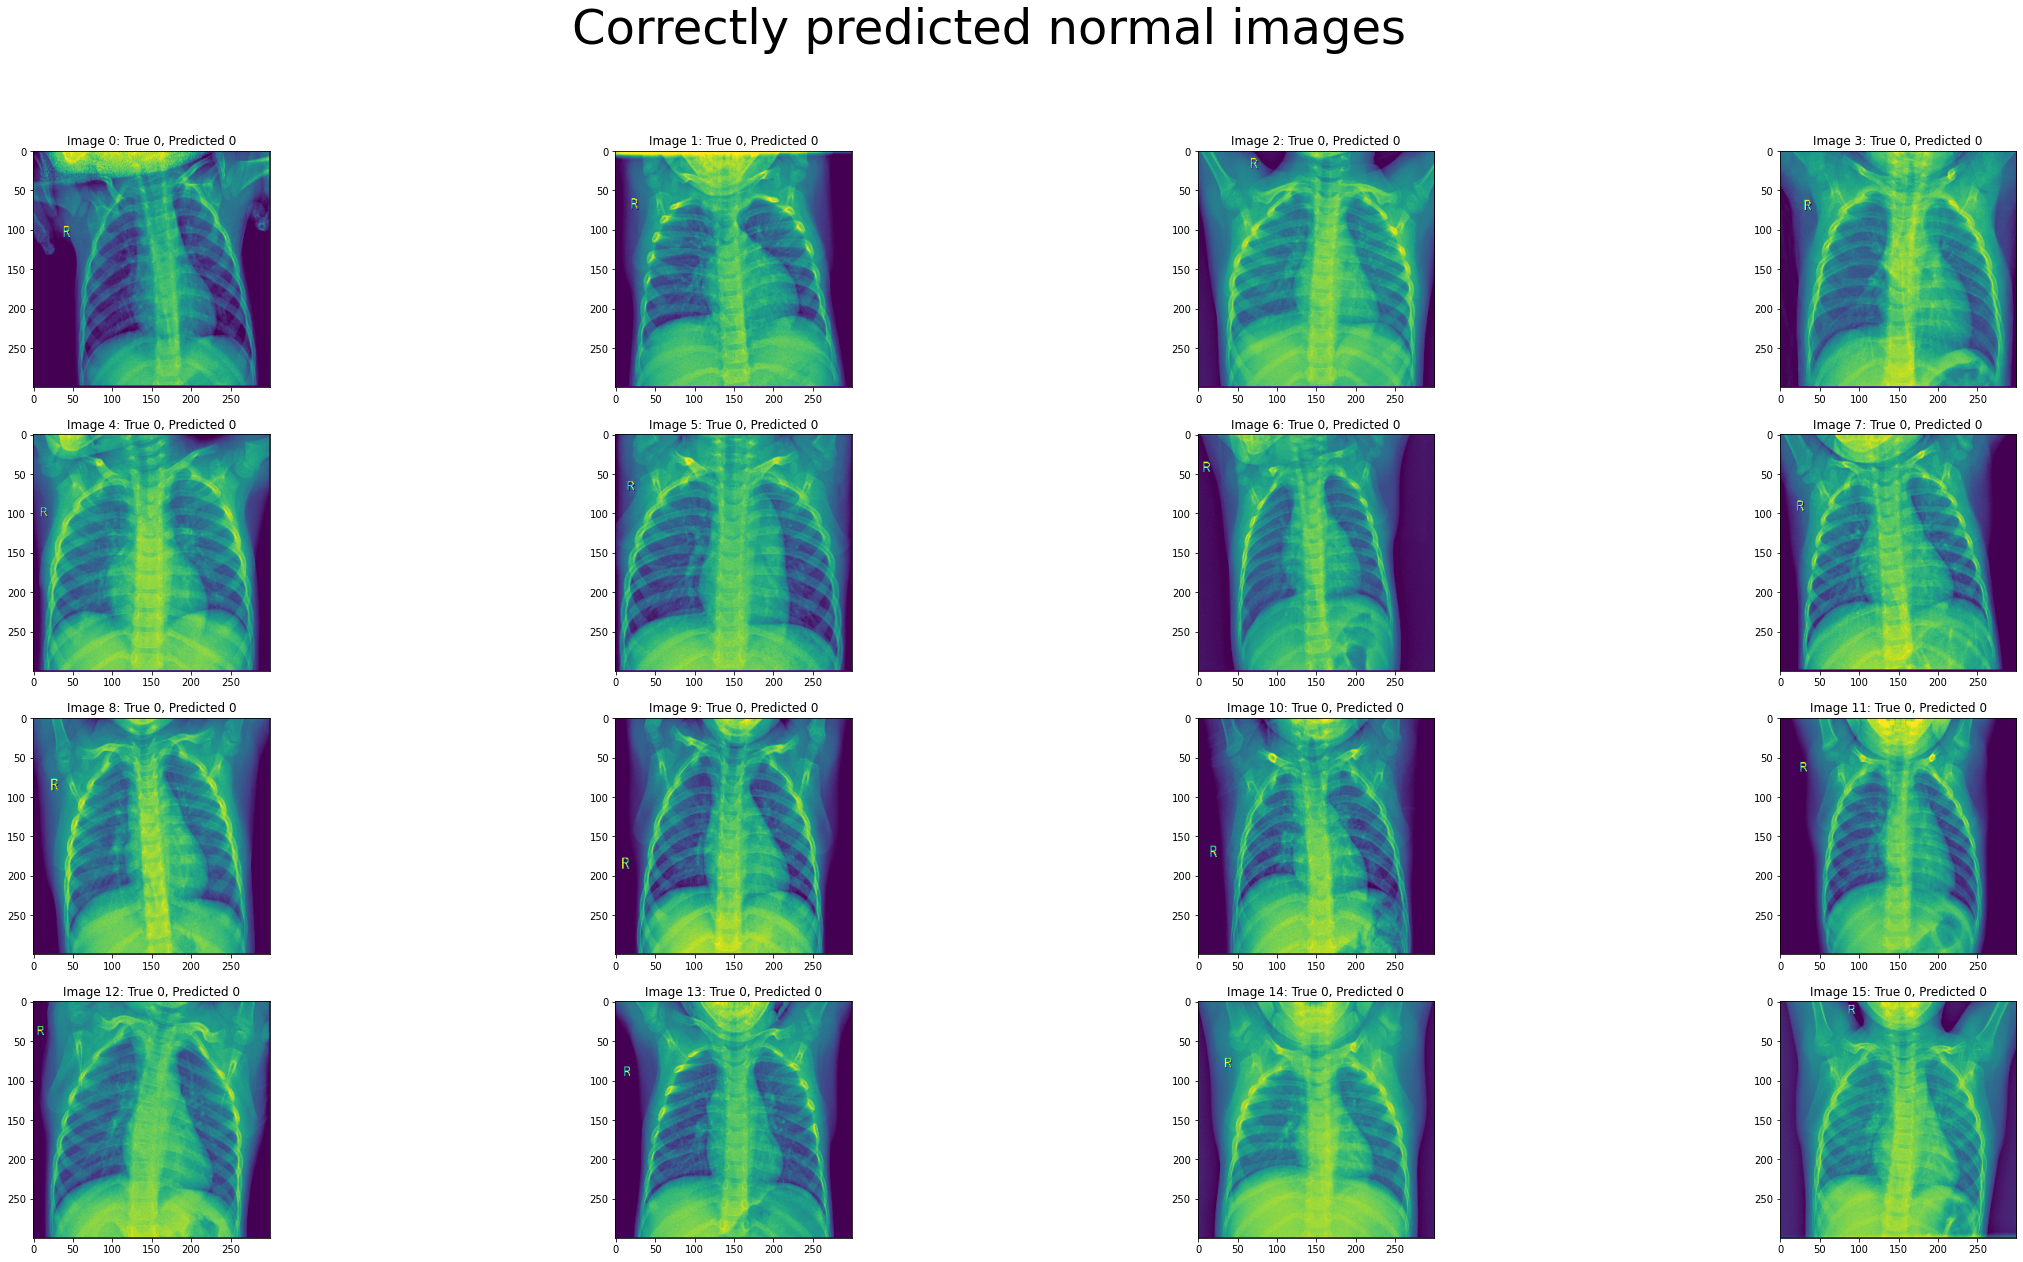

In [188]:
fig=plt.figure(figsize=(40,20))
fig.suptitle('Correctly predicted normal images'.format(n,title), fontsize=48)
columns = 4
rows = 4
for i in range(1,columns*rows +1):
  img = np.resize( testing_data[good_images[i-1]], (300, 300) )
  fig.add_subplot(rows, columns, i).set_title("Image {}: True {}, Predicted {}".format(
                                            good_images[i-1],
                                            int(testing_target[good_images[i-1]]),
                                            int(predictions[good_images[i-1]])))
  plt.imshow(img)
plt.show()

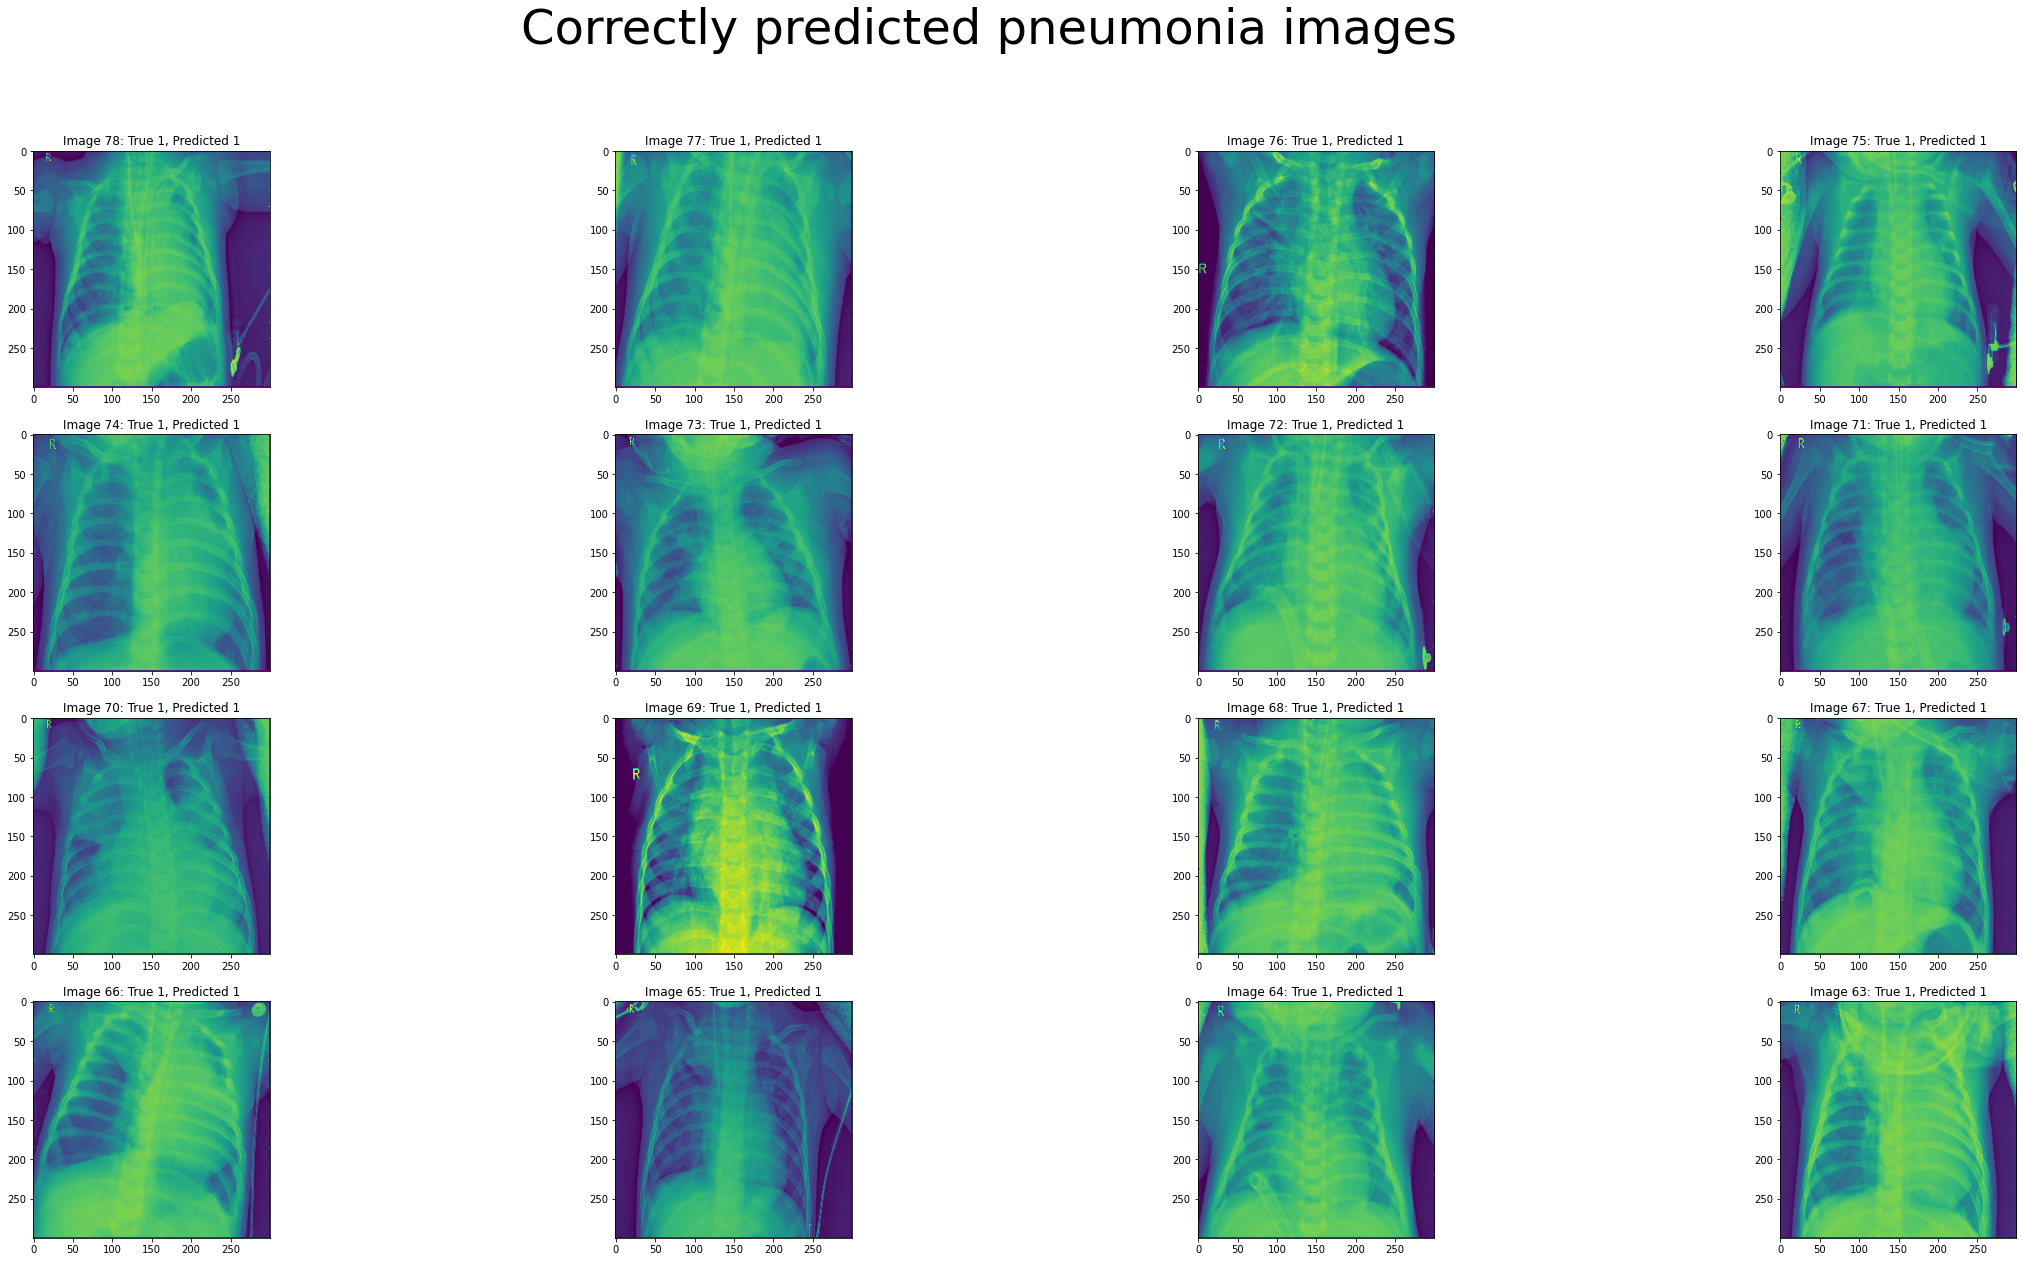

In [189]:
fig=plt.figure(figsize=(40,20))
fig.suptitle('Correctly predicted pneumonia images'.format(n,title), fontsize=48)
columns = 4
rows = 4
for i in range(1,columns*rows +1):
  img = np.resize( testing_data[good_images[-1*i]], (300, 300) )
  fig.add_subplot(rows, columns, i).set_title("Image {}: True {}, Predicted {}".format(
                                            good_images[-1*i],
                                            int(testing_target[good_images[-1*i]]),
                                            int(predictions[good_images[-1*i]])))
  plt.imshow(img)
plt.show()

In [190]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [191]:
# TODO: YOUR ANSWER
# 1)Collect more data
# 2)increase number of estimators
# 3)use entropy instead of gini index
# 4)try 2 and 3 together 

In [192]:
# 2)increase number of estimators
clf2 = RandomForestClassifier(n_estimators=500)
fitted = clf2.fit( training_data, training_target )
clf2.score( testing_data, testing_target )

0.9125

In [193]:
# 3)use entropy instead of gini index
clf3 = RandomForestClassifier(criterion="entropy")
fitted = clf3.fit( training_data, training_target )
clf3.score( testing_data, testing_target )

0.9

In [194]:
# 4)try 2 and 3 together 
clf4 = RandomForestClassifier(n_estimators=500,criterion="entropy")
fitted = clf4.fit( training_data, training_target )
clf4.score( testing_data, testing_target )

0.925

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw